In [1]:
df = pd.read_csv("C:/Users/aravi/Downloads/archive (2)/insurance.csv")

<IPython.core.display.Javascript object>

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
label = LabelEncoder()

In [7]:
a = df['smoker']

In [8]:
label_fit = label.fit(a)

In [9]:
label_transform = label_fit.transform(a)

In [26]:
 b = label_transform.reshape(-1,1)

In [21]:
one = OneHotEncoder()

In [27]:
one_fit = one.fit_transform(b)

In [29]:
print(one_fit)

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 0)	1.0
  :	:
  (1313, 1)	1.0
  (1314, 1)	1.0
  (1315, 0)	1.0
  (1316, 0)	1.0
  (1317, 0)	1.0
  (1318, 0)	1.0
  (1319, 0)	1.0
  (1320, 0)	1.0
  (1321, 1)	1.0
  (1322, 0)	1.0
  (1323, 1)	1.0
  (1324, 0)	1.0
  (1325, 0)	1.0
  (1326, 0)	1.0
  (1327, 0)	1.0
  (1328, 0)	1.0
  (1329, 0)	1.0
  (1330, 0)	1.0
  (1331, 0)	1.0
  (1332, 0)	1.0
  (1333, 0)	1.0
  (1334, 0)	1.0
  (1335, 0)	1.0
  (1336, 0)	1.0
  (1337, 1)	1.0


In [23]:
label_transform

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
df.head()

In [40]:
summa = pd.get_dummies(df['smoker'])

<IPython.core.display.Javascript object>

In [41]:
summa1 = pd.get_dummies(df['region'],drop_first = True)

<IPython.core.display.Javascript object>

In [43]:
summa

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [44]:
df.drop(['smoker'],axis = 1, inplace = True)

In [46]:
pd.concat([df,summa],axis = 1)

<IPython.core.display.Javascript object>

,age,sex,bmi,children,region,charges,no,yes
0,19,female,27.900,0,southwest,16884.92400,0,1
1,18,male,33.770,1,southeast,1725.55230,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0
4,32,male,28.880,0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,1,0
1334,18,female,31.920,0,northeast,2205.98080,1,0
1335,18,female,36.850,0,southeast,1629.83350,1,0
1336,21,female,25.800,0,southwest,2007.94500,1,0


In [69]:
df.drop(['sex'],axis = 1, inplace = True)

In [71]:
 b =pd.concat([df,summa],axis =1)

<IPython.core.display.Javascript object>

In [67]:
df.head()

,age,sex,bmi,children,charges
0,19,female,27.900,0,16884.92400
1,18,male,33.770,1,1725.55230
2,28,male,33.000,3,4449.46200
3,33,male,22.705,0,21984.47061
4,32,male,28.880,0,3866.85520


In [90]:
b.drop_duplicates(inplace = True)
b.duplicated().sum()

0

In [91]:
X = b.drop(['charges'],axis = 1)
y = b['charges']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
linear = LinearRegression()

In [96]:
linear_fit = linear.fit(X_train,y_train)

In [97]:
linear_pred = linear.predict(X_test)

In [99]:
from sklearn.metrics import r2_score

In [101]:
print(r2_score(y_test,linear_pred))

0.7717566440671345


In [102]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor_p = LinearRegression()
regressor_p.fit(X_poly, y_train)

<IPython.core.display.Javascript object>

LinearRegression()

In [104]:
y_pred_p = regressor_p.predict(poly_reg.transform(X_test))

In [105]:
print(r2_score(y_test,y_pred_p))

0.8485394038590995


In [79]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [81]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [84]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred = regressor.predict(X_test)

In [86]:
y_pred

array([15837.62961096, 14487.65353698, 18706.16258762, 19600.79893307,
       11334.38736559,  8577.19640832,  6522.01993199, 18781.62092686,
       14074.01481699, 12785.41674669,  9849.74466813, 14870.20631661,
       13763.6637087 ,  9231.76416406,  9157.99847516, 16108.83532846,
       15188.30842235, 10787.33254396, 13130.55424784,  8265.93982789,
       14665.84497348, 18459.15982319, 15378.66269778, 13368.28450199,
        9626.73704816, 13554.88295999,  6036.23994832, 15346.85780433,
        9217.1139325 , 15042.28569719, 14061.83155376, 20642.90624865,
       19529.11431418, 17955.78304915,  6117.25496378,  9649.55998135,
       17551.08882742, 12394.10346649, 14619.55594323,  9045.60192655,
        8565.01314509,  9432.03915637, 11180.89298894, 19834.86454057,
        9663.0295723 , 10401.68753507, 16010.44584756, 12474.29384177,
        8525.35070184, 15085.64859294, 10173.71355919,  9204.68878529,
       14299.69044067, 18979.89063837, 19991.76125557, 11446.17064821,
      

In [2]:
df = pd.read_csv("C:/Users/aravi/Downloads/archive (2)/insurance.csv")

<IPython.core.display.Javascript object>

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [9]:
df['region'] = le.fit_transform(df['region'])

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,1,21984.47061
4,32,male,28.880,0,no,1,3866.85520


In [15]:
df['sex'] = df['sex'].replace('male',0)
df['sex'] = df['sex'].replace('female',1)

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,3,16884.92400
1,18,0,33.770,1,no,2,1725.55230
2,28,0,33.000,3,no,2,4449.46200
3,33,0,22.705,0,no,1,21984.47061
4,32,0,28.880,0,no,1,3866.85520


In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
one = OneHotEncoder()

In [23]:
df['smoker'] = pd.get_dummies(df['smoker'],drop_first = True)

<IPython.core.display.Javascript object>

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [26]:
for i in df['bmi']:
    df['bmi'] = int(i)

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,29,0,1,3,16884.92400
1,18,0,29,1,0,2,1725.55230
2,28,0,29,3,0,2,4449.46200
3,33,0,29,0,0,1,21984.47061
4,32,0,29,0,0,1,3866.85520


In [28]:
import seaborn as sns

<AxesSubplot:>

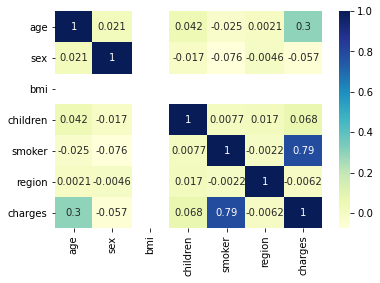

In [32]:
sns.heatmap(df.corr(), annot = True,cmap="YlGnBu")

In [33]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,NaN,0.042469,-0.025019,0.002127,0.299008
sex,0.020856,1.000000,NaN,-0.017163,-0.076185,-0.004588,-0.057292
bmi,NaN,NaN,NaN,NaN,NaN,NaN,NaN
children,0.042469,-0.017163,NaN,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,-0.076185,NaN,0.007673,1.000000,-0.002181,0.787251
region,0.002127,-0.004588,NaN,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,-0.057292,NaN,0.067998,0.787251,-0.006208,1.000000


In [149]:
X = df[['age','children','region']]
y = df['charges']

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [152]:
X_train.shape

(1003, 3)

In [153]:
X_test.shape

(335, 3)

In [154]:
y_train.shape

(1003,)

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
ln = LinearRegression()

In [157]:
ln.fit(X_train,y_train)

LinearRegression()

In [158]:
pred = ln.predict(X_test)

In [159]:
from sklearn.metrics import mean_squared_error,r2_score

In [160]:
print(mean_squared_error(y_test,pred))

134370825.20918804


In [161]:
print(r2_score(y_test,pred))

0.10968576899905746


C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

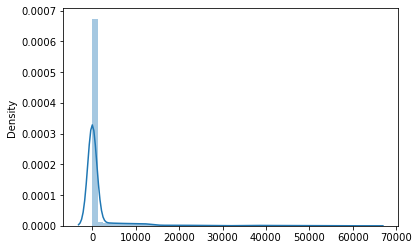

In [48]:
sns.distplot(df)

In [51]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='age', ylabel='charges'>

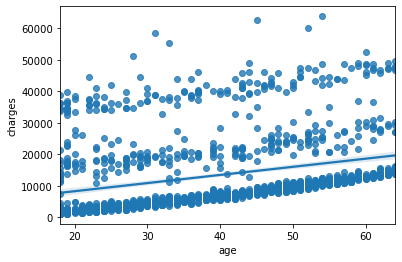

In [59]:
sns.regplot( x = 'age', y = 'charges', data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

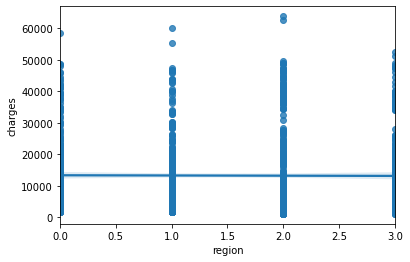

In [64]:
sns.regplot( x = 'region', y = 'charges', data = df)

In [121]:
poly = PolynomialFeatures(degree = 1)

<IPython.core.display.Javascript object>

In [122]:
p = poly.fit_transform(X_train)

In [123]:
ln.fit(p,y_train)

LinearRegression()

In [124]:
pp = ln.predict(poly.transform(X_test))

In [125]:
print(r2_score(y_test,pp))

0.7210837718117206


In [74]:
 from sklearn.linear_model import Ridge


In [75]:
r = Ridge()

In [79]:
rf = r.fit(X_train,y_train)

In [80]:
r_pred = rf.predict(X_test)

In [88]:
print(r2_score(y_test,r_pred))

0.7335271202316367


In [82]:
from sklearn.linear_model import Lasso

In [83]:
l = Lasso()

In [84]:
l_f = l.fit(X_train,y_train)

In [132]:
l_pred = l_f.predict(X_test)

In [133]:
print(r2_score(y_test,l_pred))

0.7235603678515726


In [130]:
X.shape

(1338, 6)

In [131]:
y.shape

(1338,)

In [139]:
len(X)

1338

In [142]:
len(y)

1338

In [129]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1003, 6)
(335, 6)
(1003,)
(335,)


In [148]:
    m = 0
    c = 0
    N = float(len(X))
    learningrate = 0.001
    for i in range(len(X)):
        y = m*X + c
        slope = (-2/N) * sum(X * (y - pred))
        intercept = (-2/N) * sum(y - pred)
        
        m = m- (learningrate * slope)
        c = c- ( learningrate * intercept)
    return m,b
  

ValueError: Unable to coerce to Series, length must be 6: given 442

In [147]:
len(pred)
len(y)

1338

In [ ]:
def gradient (epochs,learning_rate,xtrain,ytrain):
    m=0
    b=0
    N=xtrain.shape[0]
    
    for i in range(epochs):
        y_pred= (m*xtrain)+ b
        d_slope=(-2/N)*sum(xtrain*(ytrain-y_pred))
        d_intercept=(-2/N)*sum(ytrain-y_pred)
        #print(d_slope,d_intercept)
        m=m - (learning_rate * d_slope)
        b=b - (learning_rate * d_intercept)
        #print(m,b)
        
    return m,b

#pass different values for epoch and learning rate - they are to ounf using trail/error method there is no fixed value for it 
m,b=gradient (300,0.0000001,xtrain,ytrain)
m=m[0]
b=b[0]
print(m,b)
    

In [100]:
X_train.shape

(896, 6)

In [101]:
y_train.shape

(896,)